In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import os
os.getcwd()

'/Users/chloebergsma-safar/Desktop/Metis/NBM_Regression_Project/Metis-Regression'

## Read in data
- schools_csv.csv contains first 400 schools
- schools_csv_2.csv contains the second 400 schools
- schools_csv_3.csv contains the third 400 schools
- schools_csv_4.csv contains the last 132 schools
- total # of schools: 1332

In [3]:
schools_1_400 = pd.read_csv('schools_csv.csv')

In [4]:
schools_401_800 = pd.read_csv('schools_csv_2.csv')

In [5]:
schools_801_1200 = pd.read_csv('schools_csv_3.csv')

In [6]:
schools_1201_1332 = pd.read_csv('schools_csv_4.csv')

## Concatenate dataframes

In [7]:
schools_df = pd.concat([schools_1_400, schools_401_800, schools_801_1200, schools_1201_1332], axis=0)

In [8]:
schools_1_400.shape

(400, 36)

### Check concatenation

In [9]:
schools_401_800.shape

(400, 36)

In [10]:
schools_801_1200.shape

(400, 36)

In [11]:
schools_1201_1332.shape

(132, 36)

In [12]:
schools_df.shape

(1332, 36)

## Peform EDA on concatenated dataframe

In [13]:
schools_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1332 entries, 0 to 131
Data columns (total 36 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   school                                   1332 non-null   object 
 1   raw_stu_to_fac_ratio                     1323 non-null   object 
 2   tuition_fees_19_20                       1261 non-null   float64
 3   books_supplies_19_20                     1209 non-null   float64
 4   tuition_fees                             1264 non-null   float64
 5   books_supplies                           1214 non-null   float64
 6   tuition                                  48 non-null     float64
 7   fees                                     48 non-null     float64
 8   tuition_under                            11 non-null     float64
 9   fees_under                               11 non-null     float64
 10  ft_faculty                               1316 non

### Clean tuition and fees columns

#### Consolidate tuition and tuition_under columns, since, based on webscraping, we know that they represent the same data stored in different places on school pages (thus, the decision to extract the data differently)

In [14]:
schools_df['tuition_20_21'] = np.nan

In [15]:
schools_df.tuition_20_21.fillna(schools_df.tuition, inplace=True)

In [16]:
schools_df.tuition_20_21.fillna(schools_df.tuition_under, inplace=True)

In [17]:
# check that in new col, where tuition has a value, it was assigned to the new col
tuition_not_nan = schools_df.loc[~schools_df.tuition.isna()]
tuition_not_nan[['tuition_20_21', 'tuition', 'tuition_under']].head()

,tuition_20_21,tuition,tuition_under
4,20370.0,20370.0,NaN
5,17820.0,17820.0,NaN
6,21600.0,21600.0,NaN
9,26820.0,26820.0,NaN
10,9375.0,9375.0,NaN


In [18]:
# check that in new col, where tuition_under has a value, it was assigned to the new col
tuition_under_not_nan = schools_df.loc[~schools_df.tuition_under.isna()]
tuition_under_not_nan[['tuition_20_21', 'tuition', 'tuition_under']].head()

,tuition_20_21,tuition,tuition_under
13,22230.0,NaN,22230.0
251,13440.0,NaN,13440.0
18,10440.0,NaN,10440.0
70,26400.0,NaN,26400.0
82,19975.0,NaN,19975.0


In [19]:
# drop tuition and tuition_under columns
schools_df.drop(['tuition', 'tuition_under'],axis=1, inplace=True)

#### Consolidate fees and fees_under columns, since, based on webscraping, we know that they represent the same data stored in different places on school pages (thus, the decision to extract the data differently)

In [20]:
schools_df['fees_20_21'] = np.nan

In [21]:
schools_df.fees_20_21.fillna(schools_df.fees, inplace=True)

In [22]:
schools_df.fees_20_21.fillna(schools_df.fees_under, inplace=True)

In [23]:
# check that in new col, where fees has a value, it was assigned to the new col
fees_not_nan = schools_df.loc[~schools_df.fees.isna()]
fees_not_nan[['fees_20_21', 'fees', 'fees_under']].head()

,fees_20_21,fees,fees_under
4,300.0,300.0,NaN
5,300.0,300.0,NaN
6,435.0,435.0,NaN
9,75.0,75.0,NaN
10,600.0,600.0,NaN


In [24]:
# check that in new col, where fees_under has a value, it was assigned to the new col
fees_under_not_nan = schools_df.loc[~schools_df.fees_under.isna()]
fees_under_not_nan[['fees_20_21', 'fees', 'fees_under']].head()

,fees_20_21,fees,fees_under
13,1644.0,NaN,1644.0
251,0.0,NaN,0.0
18,60.0,NaN,60.0
70,900.0,NaN,900.0
82,2100.0,NaN,2100.0


In [25]:
# drop fees and fees_under columns
schools_df.drop(['fees', 'fees_under'],axis=1, inplace=True)

#### Combine new tuition_20_21 and fees_20_21 columns

In [26]:
schools_df['tuition_fees_20_21'] = schools_df.tuition_20_21 + schools_df.fees_20_21

In [27]:
# check that in new col, where tuition_20_21 and fees_20_21 have values, the sum
    # was assigned to the new column
tuition_20_21_not_nan = schools_df.loc[~(schools_df.tuition_20_21.isna())]
tuition_20_21_not_nan[['tuition_fees_20_21', 'tuition_20_21', 'fees_20_21']].tail()

,tuition_fees_20_21,tuition_20_21,fees_20_21
79,78241.0,73200.0,5041.0
89,13386.0,12984.0,402.0
101,26200.0,26200.0,0.0
109,18000.0,18000.0,0.0
128,10625.0,10000.0,625.0


#### Consolidate tuition_fees_20_21 and tuition_fees columns since, based on webscraping, we know that they represent the same data stored in different places on school pages (thus, the decision to extract the data differently)

In [28]:
schools_df['tuition_fees_20_21_fin'] = np.nan

In [29]:
schools_df.tuition_fees_20_21_fin.fillna(schools_df.tuition_fees, inplace=True)

In [30]:
schools_df.tuition_fees_20_21_fin.fillna(schools_df.tuition_fees_20_21, inplace=True)

In [31]:
# check that in new col, where tuition_fees has a value, it was assigned to the new col
tuition_fees_not_nan = schools_df.loc[~schools_df.tuition_fees.isna()]
tuition_fees_not_nan[['tuition_fees_20_21_fin', 'tuition_fees_20_21', 'tuition_fees']].head()

,tuition_fees_20_21_fin,tuition_fees_20_21,tuition_fees
0,9700.0,NaN,9700.0
1,20760.0,NaN,20760.0
2,6250.0,NaN,6250.0
3,32404.0,NaN,32404.0
7,46486.0,NaN,46486.0


In [32]:
# check that in new col, where tuition_fees_20_21 has a value, it was assigned to the new col
tuition_fees_20_21_not_nan = schools_df.loc[~schools_df.tuition_fees_20_21.isna()]
tuition_fees_20_21_not_nan[['tuition_fees_20_21_fin', 'tuition_fees_20_21', 'tuition_fees']].head()

,tuition_fees_20_21_fin,tuition_fees_20_21,tuition_fees
4,20670.0,20670.0,NaN
5,18120.0,18120.0,NaN
6,22035.0,22035.0,NaN
9,26895.0,26895.0,NaN
10,9975.0,9975.0,NaN


In [33]:
# drop tuition_fees, tuition_fees_20_21, fees_20_21 and tuition_20_21 columns
schools_df.drop(['tuition_fees', 'tuition_fees_20_21', 'fees_20_21', 'tuition_20_21'],axis=1, inplace=True)

#### Drop tuition_fees_19_20 column and any rows with nan in tuition_fees_20_21_fin (our target variable for the linear regression)

In [34]:
schools_df.drop(['tuition_fees_19_20'],axis=1, inplace=True)

In [35]:
schools_df.dropna(subset=['tuition_fees_20_21_fin'], inplace=True)

In [36]:
schools_df.shape # by dropping nan in tuition_fees_20_21_fin, we lost 9 rows

(1323, 31)

### Clean enrollment columns

In [37]:
schools_df[['school','total_enroll', 'total_enroll_under', 'under_enroll', 'under_trans_enroll', 'grad_enroll']].sample(10)

,school,total_enroll,total_enroll_under,under_enroll,under_trans_enroll,grad_enroll
365,Drake University,4774.0,NaN,2848.0,89.0,1926.0
45,Reformed University,168.0,NaN,152.0,39.0,16.0
177,College of Mount Saint Vincent,2663.0,NaN,2257.0,571.0,406.0
173,Monmouth College,NaN,860.0,NaN,24.0,NaN
28,Oakwood University,1374.0,NaN,1339.0,46.0,35.0
70,Landmark College,559.0,NaN,501.0,34.0,58.0
91,Compass College of Cinematic Arts,NaN,72.0,NaN,4.0,NaN
255,Maple Springs Baptist Bible College and Seminary,NaN,NaN,NaN,NaN,NaN
373,Huntsville Bible College,114.0,NaN,84.0,3.0,30.0
106,Eureka College,NaN,511.0,NaN,69.0,NaN


In [38]:
schools_df['total_under_enroll'] = np.nan

In [39]:
schools_df['total_under_enroll'].fillna(schools_df.total_enroll_under, inplace=True)

In [40]:
schools_df['total_under_enroll'].fillna(schools_df.under_enroll, inplace=True)

In [41]:
# check that in new col, where total_enroll_under has a value, it was assigned to the new col
total_enroll_under_not_nan = schools_df.loc[~schools_df.total_enroll_under.isna()]
total_enroll_under_not_nan[['total_under_enroll', 'total_enroll_under', 'under_enroll']].sample(5)

,total_under_enroll,total_enroll_under,under_enroll
390,1802.0,1802.0,NaN
393,71.0,71.0,NaN
396,156.0,156.0,NaN
17,44481.0,44481.0,NaN
317,119.0,119.0,NaN


In [42]:
# check that in new col, where under_enroll has a value, it was assigned to the new col
under_enroll_not_nan = schools_df.loc[~schools_df.under_enroll.isna()]
under_enroll_not_nan[['total_under_enroll', 'total_enroll_under', 'under_enroll']].sample(5)

,total_under_enroll,total_enroll_under,under_enroll
66,1306.0,NaN,1306.0
218,1207.0,NaN,1207.0
236,1301.0,NaN,1301.0
272,1845.0,NaN,1845.0
254,722.0,NaN,722.0


In [43]:
# drop total_enroll_under and under_enroll columns
schools_df.drop(['total_enroll_under', 'under_enroll'],axis=1, inplace=True)

In [44]:
# drop total_enroll (i.e., the sum of under_enroll, under_trans_enroll, and grad_enroll, 
    # since not enough schools have grad programs to consider info about them 
schools_df.drop(['total_enroll', 'grad_enroll'], axis=1, inplace=True)

#### Investigate the 5 schools with nan in new total_under_enroll column and the under_trans_enroll column

In [45]:
total_under_enroll_nan = schools_df.loc[(schools_df.total_under_enroll.isna()) & (schools_df.under_trans_enroll.isna())]
total_under_enroll_nan[['school', 'total_under_enroll', 'under_trans_enroll']]

,school,total_under_enroll,under_trans_enroll
24,Montana Bible College,NaN,NaN
257,Zaytuna College,NaN,NaN
308,Southwest University of Visual Arts-Tucson,NaN,NaN
341,Faith Theological Seminary and Christian College,NaN,NaN
255,Maple Springs Baptist Bible College and Seminary,NaN,NaN


- Montana Bible College: according to NCES website, "Data not available."
- Zaytuna College: " "
- Southwest University of Visual Arts-Tucson: " "
- Faith Theological Seminary and Christian College: " "
- Maple Springs Baptist Bible College and Seminary: according to NCES website, "School failed to provide data and is subject to administrative action, including a fine or termination of eligibility to participate in federal student aid."

In [46]:
# look at other columns for these schools to see if they are worth keeping in for other 
    # info besides enrollment data
total_under_enroll_nan.iloc[:,:15]

,school,raw_stu_to_fac_ratio,books_supplies_19_20,books_supplies,ft_faculty,pt_faculty,avg_amt_grant_schol_aid_beg_under_19_20,perc_grant_schol_aid_beg_under_19_20,avg_amt_grant_schol_aid_all_under_19_20,under_trans_enroll,under_apps,perc_admitted,sat_scores_submit,perc_sat_scores_submit,act_scores_submit
24,Montana Bible College,NaN,300.0,300.0,NaN,NaN,NaN,15.0,582.0,NaN,28.0,79.0,NaN,NaN,NaN
257,Zaytuna College,NaN,NaN,200.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
308,Southwest University of Visual Arts-Tucson,NaN,1000.0,1038.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
341,Faith Theological Seminary and Christian College,NaN,300.0,300.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
255,Maple Springs Baptist Bible College and Seminary,NaN,260.0,260.0,1.0,8.0,1500.0,3.0,1500.0,NaN,NaN,NaN,NaN,NaN,NaN


In [47]:
total_under_enroll_nan.iloc[:,15:]

,perc_act_scores_submit,sat_read_write_25_perc,sat_read_write_75_perc,sat_math_25_perc,sat_math_75_perc,act_comp_25_perc,act_comp_75_perc,act_eng_25_perc,act_eng_75_perc,act_math_25_perc,act_math_75_perc,tuition_fees_20_21_fin,total_under_enroll
24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9040.0,NaN
257,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19250.0,NaN
308,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23069.0,NaN
341,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1520.0,NaN
255,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5400.0,NaN


In [48]:
# drop Zaytuna College, Southwest University of Visual Arts-Tucson, and 
    # Faith Theological Seminary and Christian College, since the only feature for which
    # they have data is the price of books and supplies in 20-21
schools_drop_no_enroll_data = ['Zaytuna College', 'Southwest University of Visual Arts-Tucson',
                              'Faith Theological Seminary and Christian College']
schools_df = schools_df[schools_df.school.isin(schools_drop_no_enroll_data) == False]

#### Look at summary statistics of total_under_enroll column and its distribution to determine what values to assign the other two schools with missing datda in the total_under_enroll column

In [49]:
schools_df[['total_under_enroll']].describe()

,total_under_enroll
count,1318.000000
mean,2055.184370
std,5229.104645
min,2.000000
25%,365.000000
50%,1107.000000
75%,2160.500000
max,111599.000000


<AxesSubplot:xlabel='total_under_enroll', ylabel='Count'>

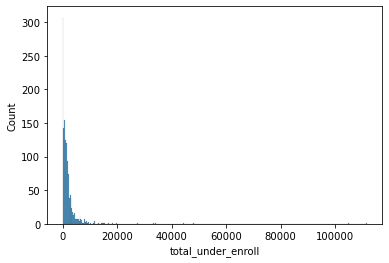

In [50]:
sns.histplot(schools_df.total_under_enroll)

/opt/anaconda3/envs/metis/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='total_under_enroll'>

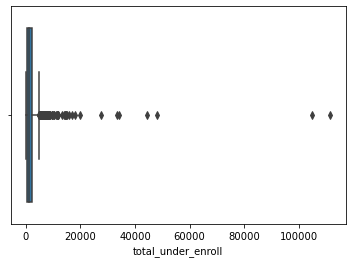

In [51]:
sns.boxplot(schools_df.total_under_enroll)

#### Since there are many outliers in the total_under_enroll column, assign the median of that column to the two schools missing data in that column

In [52]:
total_under_enroll_med = schools_df['total_under_enroll'].median()
schools_df.total_under_enroll.fillna(total_under_enroll_med, inplace=True)

In [53]:
schools_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1320 entries, 0 to 131
Data columns (total 28 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   school                                   1320 non-null   object 
 1   raw_stu_to_fac_ratio                     1318 non-null   object 
 2   books_supplies_19_20                     1204 non-null   float64
 3   books_supplies                           1208 non-null   float64
 4   ft_faculty                               1309 non-null   float64
 5   pt_faculty                               1309 non-null   float64
 6   avg_amt_grant_schol_aid_beg_under_19_20  1276 non-null   float64
 7   perc_grant_schol_aid_beg_under_19_20     1315 non-null   float64
 8   avg_amt_grant_schol_aid_all_under_19_20  1313 non-null   float64
 9   under_trans_enroll                       1318 non-null   float64
 10  under_apps                               1086 non

### Clean student-to-faculty ratio column

In [54]:
# look at values in raw_stu_to_fac_ratio
schools_df['raw_stu_to_fac_ratio'].value_counts()

12 to 1                                                                                                                                                                                                                                   168
11 to 1                                                                                                                                                                                                                                   152
10 to 1                                                                                                                                                                                                                                   135
13 to 1                                                                                                                                                                                                                                   127
14 to 1                                         

In [55]:
# look at unique values in raw_stu_to_fac_ratio column to see if there's extra white space
schools_df['raw_stu_to_fac_ratio'].unique()

array(['6 to 1', '8 to 1', '4 to 1', '5 to 1', '7 to 1', '3 to 1',
       '10 to 1', '11 to 1', '9 to 1', '14 to 1', '2 to 1', '16 to 1',
       '21 to 1', '20 to 1', '15 to 1', '33 to 1', nan, '12 to 1',
       '18 to 1', '13 to 1', '26 to 1', '19 to 1', '22 to 1', '23 to 1',
       '17 to 1', '1 to 1',
       '3 to 1View noteThe institution had a significant decrease in enrollment for the 2020-21 year, while retaining its full-time faculty.',
       "13 to 1View noteDue to the COVID-19 pandemic, USD's undergraduate enrollment for Fall 2020 was lower than in previous fall terms resulting in a lower student-to-faculty ratio.",
       '42 to 1', '28 to 1',
       '4 to 1View notePlease interpret these data in the context of the COVID-19 pandemic, which has created some anomalies and fluctuations in enrollment and related statistics.',
       '25 to 1', '31 to 1', '30 to 1', '40 to 1', '35 to 1', '27 to 1',
       '12 to 1View noteThe reduction in the student faculty ratio is directly re

In [56]:
# create a list containing the str value in the column raw_stu_to_fac_ratio
stu_to_fac_ratio_ls = [row for row in schools_df['raw_stu_to_fac_ratio'].astype(str)]

In [57]:
# split each str value in the list into a list, so there are inner lists, one per str
stu_to_fac_ratio_ls = [ele.split(' ') for ele in stu_to_fac_ratio_ls]

In [58]:
print(stu_to_fac_ratio_ls[0])
print(stu_to_fac_ratio_ls[0][2][0])

['6', 'to', '1']
1


In [59]:
for lst in stu_to_fac_ratio_ls:
    if len(lst) == 1:
        print(lst)

['nan']
['nan']


In [60]:
# create a list that keeps just the first three elements in each inner list
stu_to_fac_ratio_ls_rev = [ls[:3] for ls in stu_to_fac_ratio_ls] 

In [61]:
for lst in stu_to_fac_ratio_ls_rev:
    if len(lst) == 1:
        print(lst)

['nan']
['nan']


In [62]:
# loop through the new list to find the indices of the inner lists whose third element
    # is of length greater than one

indices = []

for i in range(0, len(stu_to_fac_ratio_ls_rev)):
    if len(stu_to_fac_ratio_ls_rev[i]) > 1:
        if len(stu_to_fac_ratio_ls_rev[i][2]) > 1:
            indices.append(i)

In [63]:
# print out the lists whose third element is of length greater than one

for i in indices:
    print(stu_to_fac_ratio_ls_rev[i])

['3', 'to', '1View']
['13', 'to', '1View']
['4', 'to', '1View']
['12', 'to', '1View']
['21', 'to', '1View']


In [64]:
# create a final list that fixes inner lists whose third element has 'View' in it

stu_to_fac_ratio_ls_rev_2 = []

for i in range(0, len(stu_to_fac_ratio_ls_rev)):
    if i in indices:
        first_char = stu_to_fac_ratio_ls_rev[i][0]
        second_char = stu_to_fac_ratio_ls_rev[i][1]
        third_char = stu_to_fac_ratio_ls_rev[i][2].replace('1View','1')
        stu_to_fac_ratio_ls_rev_2.append([first_char, second_char, third_char])
    else:
        stu_to_fac_ratio_ls_rev_2.append(stu_to_fac_ratio_ls_rev[i])

In [65]:
# delete elements in each inner list that are the word 'to'

for ele in stu_to_fac_ratio_ls_rev_2:
    if len(ele) > 1:
        del ele[1]

In [66]:
# replace inner lists that are ['nan'] with ['0', '1'] so that next the elements in every
    # inner list can be converted to integers and math can be done on them

stu_to_fac_ratio_ls_rev_3 = []

for ele in stu_to_fac_ratio_ls_rev_2:
    if len(ele) <= 1:
        new_ele = ele[0].replace("nan", "0")
        second_new_ele = '1'
        stu_to_fac_ratio_ls_rev_3.append([new_ele, second_new_ele])
    else:
        stu_to_fac_ratio_ls_rev_3.append(ele)

In [67]:
# convert elements in inner lists to type integer

stu_to_fac_ratio_ls_rev_3 = [[int(x) for x in lst] for lst in stu_to_fac_ratio_ls_rev_3]

In [68]:
# create a new list of innenr lists that each contian the result of the first element
    # divided by the second element of each inner list

stu_to_fac_ratio_ls_rev_4 = [[lst[0] / lst[1]] for lst in stu_to_fac_ratio_ls_rev_3]

In [69]:
# flatten the above list so each new float value isn't in its own list

flattened_stu_to_fac_ratio = [item for sublist in stu_to_fac_ratio_ls_rev_4 for item in sublist]

In [70]:
# add cleaned student-to-faculty ratio list back to df

schools_df['stu_to_fac_ratio'] = flattened_stu_to_fac_ratio

In [71]:
# drop the rows with 0 in the new stu_to_fac_ratio column, since those were missing values
    # in the original student-to-faculty ratio column
schools_df = schools_df.loc[schools_df.stu_to_fac_ratio != 0]

In [72]:
# drop raw_stu_to_fac_ratio column from dataframe
schools_df.drop(['raw_stu_to_fac_ratio'],axis=1,inplace=True)

### Clean books and supplies columns

In [73]:
# drop books_supplies_19_20 column
schools_df.drop(['books_supplies_19_20'],axis=1,inplace=True)

#### Look at spread of books_supplies column

<AxesSubplot:xlabel='books_supplies', ylabel='Count'>

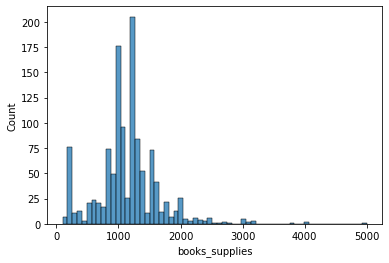

In [74]:
sns.histplot(schools_df.books_supplies)

In [75]:
schools_df[['books_supplies']].describe()

,books_supplies
count,1206.000000
mean,1149.410448
std,514.777040
min,100.000000
25%,930.000000
50%,1150.000000
75%,1349.500000
max,5000.000000


#### Since the mean and median are almost exactly the same, it seems like I can pick either value to impute the value of this variable for schools with missing data; I'll use median.

In [76]:
books_supplies_med = schools_df['books_supplies'].median()
schools_df.books_supplies.fillna(books_supplies_med, inplace=True)

### Clean faculty columns

#### Look at spread of each column

In [77]:
schools_df[['ft_faculty', 'pt_faculty']].describe()

,ft_faculty,pt_faculty
count,1308.000000,1308.000000
mean,191.912844,145.169725
std,585.264728,301.973679
min,0.000000,0.000000
25%,23.000000,21.000000
50%,69.000000,64.000000
75%,149.250000,159.250000
max,6927.000000,6340.000000


<AxesSubplot:xlabel='ft_faculty', ylabel='Count'>

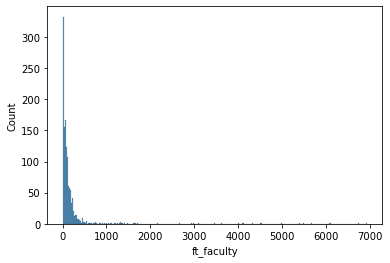

In [78]:
sns.histplot(schools_df['ft_faculty'])

<AxesSubplot:xlabel='pt_faculty', ylabel='Count'>

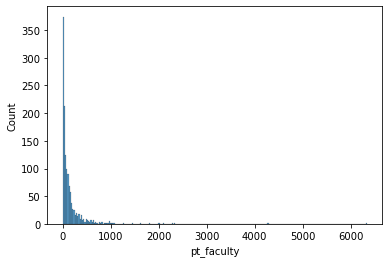

In [79]:
sns.histplot(schools_df['pt_faculty'])

#### Since the distribution of both columns is right-skewed, I will use the medians to impute them for schools missing this data.

In [80]:
ft_faculty_med = schools_df['ft_faculty'].median()
schools_df.ft_faculty.fillna(ft_faculty_med, inplace=True)

In [81]:
pt_faculty_med = schools_df['pt_faculty'].median()
schools_df.pt_faculty.fillna(pt_faculty_med, inplace=True)

### Clean applications apps

#### Look at schools missing number of undergraduate applications

In [82]:
# there are 233 schools missing data in this column
len(schools_df.loc[schools_df['under_apps'].isna()])

233

In [83]:
# I'll randomly research 23 of them on NCES' website

under_apps_nan = schools_df.loc[schools_df['under_apps'].isna()]
under_apps_nan[['school']].sample(23)

,school
326,University of the Southwest
286,Mid-America Christian University
139,Williamson Christian College
178,National University of Natural Medicine
240,University of the People
135,City University of Seattle
137,Indiana Wesleyan University-National & Global
45,Reformed University
143,Faith International University
293,Ottawa University-Phoenix


#### Of the 23 schools I randomly sampled who didn't have undergraduate application data:
    - 6 (~26%) stated it's because they don't admit full-time first-time degree/certificate-seeking students
    - 16 (~70%) stated it's because they have an open admission policy
    - 1 (!4%) stated it's because they're not required to provide admissions or test score data

- Samuel Merritt University: 'This institution does not admit full-time first-time degree/certificate-seeking students, therefore admission information was not reported.'
- Atlantic Institute of Oriental Medicine: " "
- Oak Point University: " "
- Touro University Nevada: " "
- Sentara College of Health Sciences: " "
- Rush University: " "
- Parker University: 'This institution has an open admission policy. Contact the institution for more information.'
- Virginia University of Lynchburg: " "
- Walla Walla University: " "
- Martin University: " "
- Bethlehem College & Seminary: " "
- Beulah Heights University: " "
- Jarvis Christian College: " "
- Pittsburgh Technical College: " "
- Talmudic College of Florida: '" "
- Rabbinical College Ohr Yisroel: " "
- Remington College-Shreveport Campus: " "
- Ohio Christian University: " "
- Yeshiva Yesoda Hatorah Vetz Chaim: " "
- Faith International University: " "
- Miles College: " "
- Lincoln University: " "
- Central Yeshiva Beth Joseph: "This institution was not required to provide admissions or test score data."

#### Create new columns to code for the presence or absence or admissions data. The absence represents those who likely have an open admissions policy or don't admit full-time first-time degree/certificate seeking students.

In [84]:
# add column that indicates presence of admissions data
schools_df['admiss_data_pres'] = schools_df.under_apps.map(lambda x: 1 if not np.isnan(x) else 0)

In [85]:
# check new column
schools_df['admiss_data_pres'].value_counts()

1    1085
0     233
Name: admiss_data_pres, dtype: int64

In [86]:
# add column that indicates absence of admissions data
schools_df['admiss_data_abs'] = schools_df.under_apps.map(lambda x: 0 if not np.isnan(x) else 1)

In [87]:
# check new column
schools_df['admiss_data_abs'].value_counts()

0    1085
1     233
Name: admiss_data_abs, dtype: int64

#### Look at spread of under_apps and perc_admitted

In [88]:
schools_df[['under_apps', 'perc_admitted']].describe()

,under_apps,perc_admitted
count,1085.000000,1085.000000
mean,4443.299539,68.183410
std,7863.312560,21.787224
min,1.000000,0.000000
25%,583.000000,57.000000
50%,2017.000000,72.000000
75%,4711.000000,83.000000
max,80210.000000,100.000000


<AxesSubplot:xlabel='under_apps', ylabel='Count'>

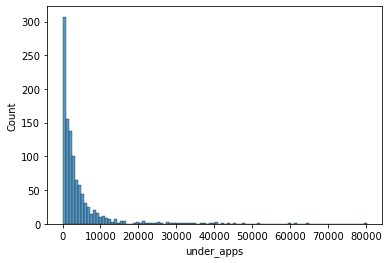

In [89]:
sns.histplot(schools_df.under_apps)

<AxesSubplot:xlabel='perc_admitted', ylabel='Count'>

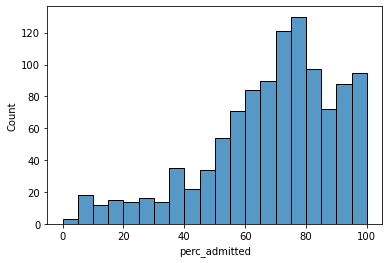

In [90]:
sns.histplot(schools_df.perc_admitted)

#### Since under_apps column is right-skewed, inpute the median for the schools with missing data in the under_apps column. For the perc_admitted column, impute 100%, since most of the schools I sampled who are missing admissions data have open admissions, so the argument could be made that they admit 100% of those who apply.

In [91]:
under_apps_med = schools_df.under_apps.median()
schools_df.under_apps.fillna(under_apps_med, inplace=True)

In [92]:
schools_df.perc_admitted.fillna(100.0, inplace=True)

### Clean financial aid columns

#### Investigate the NCES pages of the 7 schools missing average amount of grant or scholarship aid received by undergrad students in 2019-20

In [93]:
schools_df.loc[schools_df.avg_amt_grant_schol_aid_all_under_19_20.isna()]

,school,books_supplies,ft_faculty,pt_faculty,avg_amt_grant_schol_aid_beg_under_19_20,perc_grant_schol_aid_beg_under_19_20,avg_amt_grant_schol_aid_all_under_19_20,under_trans_enroll,under_apps,perc_admitted,...,act_comp_75_perc,act_eng_25_perc,act_eng_75_perc,act_math_25_perc,act_math_75_perc,tuition_fees_20_21_fin,total_under_enroll,stu_to_fac_ratio,admiss_data_pres,admiss_data_abs
183,Northwestern Polytechnic University,1210.0,4.0,4.0,NaN,0.0,NaN,0.0,13.0,46.0,...,NaN,NaN,NaN,NaN,NaN,8720.0,6.0,2.0,1,0
193,Pacific States University,1687.0,2.0,8.0,NaN,0.0,NaN,1.0,2017.0,100.0,...,NaN,NaN,NaN,NaN,NaN,12960.0,2.0,5.0,0,1
264,Atlantic Institute of Oriental Medicine,1150.0,6.0,0.0,NaN,0.0,NaN,69.0,2017.0,100.0,...,NaN,NaN,NaN,NaN,NaN,17595.0,69.0,6.0,0,1
340,Fairfax University of America,1200.0,10.0,32.0,NaN,NaN,NaN,0.0,2017.0,100.0,...,NaN,NaN,NaN,NaN,NaN,10328.0,17.0,4.0,0,1
126,W L Bonner College,1150.0,1.0,5.0,NaN,NaN,NaN,2.0,2017.0,100.0,...,NaN,NaN,NaN,NaN,NaN,5416.0,21.0,3.0,0,1
213,Gratz College,1150.0,4.0,25.0,NaN,NaN,NaN,23.0,2017.0,100.0,...,NaN,NaN,NaN,NaN,NaN,20633.0,159.0,12.0,0,1
62,Hebrew College,1150.0,9.0,31.0,NaN,NaN,NaN,0.0,2017.0,100.0,...,NaN,NaN,NaN,NaN,NaN,30000.0,26.0,1.0,0,1


- Northwestern Polytechnic University: $0 in total amount of aid received column
- Pacific States University: " "
- Atlantic Institute of Oriental Medicine: " "
- Fairfax University of America: 'Average amounts are withheld to preserve the confidentiality of individuals.' (17 undergrad students)
- Gratz College: " " (159 undergrad students)
- Hebrew College: " " (26 undergrad students)
- W L Bonner College: "Data not available."

#### Look at spread of this column

In [94]:
schools_df[['avg_amt_grant_schol_aid_all_under_19_20']].describe()

,avg_amt_grant_schol_aid_all_under_19_20
count,1311.000000
mean,17948.205187
std,10971.847391
min,676.000000
25%,8519.000000
50%,16840.000000
75%,24493.000000
max,58244.000000


<AxesSubplot:xlabel='avg_amt_grant_schol_aid_all_under_19_20', ylabel='Count'>

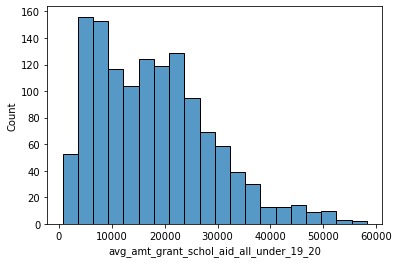

In [95]:
sns.histplot(schools_df.avg_amt_grant_schol_aid_all_under_19_20)

#### Assign '0' to the three schools with $0 under 'Total amount of aid received'; impute the median average amount of aid for the other four schools missing values in this column.

In [96]:
schools_zero_aid = ['Northwestern Polytechnic University', 'Pacific States University',
                   'Atlantic Institute of Oriental Medicine']
schools_df.loc[schools_df.school.isin(schools_zero_aid),['avg_amt_grant_schol_aid_all_under_19_20']] = 0

In [97]:
schools_med_aid = ['Fairfax University of America', 'Gratz College','Hebrew College','W L Bonner College']
avg_amt_grant_schol_aid_all_under_19_20_med = schools_df['avg_amt_grant_schol_aid_all_under_19_20'].median()
schools_df.loc[schools_df.school.isin(schools_med_aid),['avg_amt_grant_schol_aid_all_under_19_20']] = avg_amt_grant_schol_aid_all_under_19_20_med

In [98]:
schools_df.loc[schools_df.school.isin(schools_med_aid)]

,school,books_supplies,ft_faculty,pt_faculty,avg_amt_grant_schol_aid_beg_under_19_20,perc_grant_schol_aid_beg_under_19_20,avg_amt_grant_schol_aid_all_under_19_20,under_trans_enroll,under_apps,perc_admitted,...,act_comp_75_perc,act_eng_25_perc,act_eng_75_perc,act_math_25_perc,act_math_75_perc,tuition_fees_20_21_fin,total_under_enroll,stu_to_fac_ratio,admiss_data_pres,admiss_data_abs
340,Fairfax University of America,1200.0,10.0,32.0,NaN,NaN,16829.5,0.0,2017.0,100.0,...,NaN,NaN,NaN,NaN,NaN,10328.0,17.0,4.0,0,1
126,W L Bonner College,1150.0,1.0,5.0,NaN,NaN,16829.5,2.0,2017.0,100.0,...,NaN,NaN,NaN,NaN,NaN,5416.0,21.0,3.0,0,1
213,Gratz College,1150.0,4.0,25.0,NaN,NaN,16829.5,23.0,2017.0,100.0,...,NaN,NaN,NaN,NaN,NaN,20633.0,159.0,12.0,0,1
62,Hebrew College,1150.0,9.0,31.0,NaN,NaN,16829.5,0.0,2017.0,100.0,...,NaN,NaN,NaN,NaN,NaN,30000.0,26.0,1.0,0,1


In [99]:
# drop avg_amt_grant_schol_aid_beg_under_19_20 and perc_grant_schol_aid_beg_under_19_20
    # since they're messy because of the way the data was scraped, some values in 
    # perc_grant_schol_aid_beg_under_19_20 are actually perc_grant_schol_aid_all_under_19_20
    # values and some values in perc_grant_schol_aid_beg_under_19_20 are over 100% because
    # they're actually # of students receiving grant or scholarship aid
schools_df.drop(['avg_amt_grant_schol_aid_beg_under_19_20', 
                 'perc_grant_schol_aid_beg_under_19_20'],axis=1, inplace=True)

In [100]:
schools_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1318 entries, 0 to 131
Data columns (total 27 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   school                                   1318 non-null   object 
 1   books_supplies                           1318 non-null   float64
 2   ft_faculty                               1318 non-null   float64
 3   pt_faculty                               1318 non-null   float64
 4   avg_amt_grant_schol_aid_all_under_19_20  1318 non-null   float64
 5   under_trans_enroll                       1318 non-null   float64
 6   under_apps                               1318 non-null   float64
 7   perc_admitted                            1318 non-null   float64
 8   sat_scores_submit                        650 non-null    float64
 9   perc_sat_scores_submit                   650 non-null    float64
 10  act_scores_submit                        660 non-

### Clean test score columns

In [106]:
# look at schools with admissions data but no sat and no act test scores - 417 schools meet this criteria
admiss_data_no_test_data = schools_df.loc[(schools_df.admiss_data_pres == 1) & ((schools_df.sat_scores_submit.isna()) & (schools_df.act_scores_submit.isna()))]

In [109]:
# randomly sample 20 of these schools to look at why they might not have test score data
admiss_data_no_test_data.school.sample(20)

115                  Bennington College
360       Trinity Washington University
2         Yeshiva Gedolah Zichron Leyma
344    Cleveland University-Kansas City
391                Yeshiva Derech Chaim
127    California Institute of the Arts
125                 Wesleyan University
150      Bet Medrash Gadol Ateret Torah
21                    Morehouse College
147                 Lake Forest College
Name: school, dtype: object

- Associated Beth Rivkah Schools: admissions considerations doesn't list ACT/SAT scores
- Sh'or Yoshuv Rabbinical College: " "
- Beth Medrash of Asbury Park: " "
- Yeshiva Gedolah Shaarei Shmuel: " "
- Yeshiva Gedolah Zichron Leyma: " "
- Yeshiva Gedola Tiferes Yaakov Yitzchok: " "
- Bet Medrash Gadol Ateret Torah: " "
- Syracuse University: " "
- Bennington College: " "
- Yeshiva Derech Chaim: " "
- California Institute of the Arts: " "
- Lenoir-Rhyne University: under admissions considerations, 'recommended' is checked (versus required or considered but not required or not listed at all as a consideration)
- Edgewood College: " "
- Trinity Washington University: " "
- Cleveland University-Kansas City: " "
- Wesleyan University: " "
- Lake Forest College: " "
- Dominican College of Blauvelt: under admissions considerations, 'considered but not required' is checked (versus required or recommended or not listed at all as a consideration)
- Lincoln College: " "
- Morehouse College: " "

In [118]:
# look at schools with sat or act scores and randomly sample 20
sat_or_act_not_nan = schools_df.loc[(~(schools_df.sat_scores_submit.isna()) | (~(schools_df.act_scores_submit.isna())))]
sat_or_act_not_nan.school.sample(20)

141                            Kenyon College
34                             Austin College
375                     John Brown University
51                             Rhodes College
329                     Seton Hall University
118             University of the Cumberlands
321                        Trinity University
93                          Allegheny College
247                  University of St Francis
88                          Asbury University
348    Florida Institute of Technology-Online
29               York College of Pennsylvania
294                Ottawa University-Surprise
151                 Hawaii Pacific University
399                       Livingstone College
317                  Roberts Wesleyan College
69               Southeastern Baptist College
340           Stevens Institute of Technology
228                     Immaculata University
327                     Saint Vincent College
Name: school, dtype: object

- Kenyon College: under admissions considerations, 'considered but not required' is checked (versus required or recommended or not listed at all as a consideration)
- Austin College: " "
- Rhodes College: " "
- - University of the Cumberlands: " "
- Allegheny College: " "
- University of St Francis: " "
- Asbury University: " "
- Florida Institute of Technology-Online: " "
- Hawaii Pacific University: " "
- Roberts Wesleyan College: " "
- Southeastern Baptist College: " "
- Stevens Institute of Technology: " "
- Immaculata University: " "
- Saint Vincent College: " "
- John Brown University: under admissions considerations, 'required' is checked (versus recommended or considered but not recommended not listed at all as a consideration)
- Seton Hall University: " "
- Trinity University: " "
- York College of Pennsylvania: " "
- Ottawa University-Surprise: " "
- Livingstone College: " "

#### Notes: 
- If perc_grant_schol_aid_beg_under_19_20 > 100, it means it's capturing # of students, not %
- if avg_amt_grant_schol_aid_beg_under_19_20 == avg_amt_grant_schol_aid_all_under_19_20, it means there's only data for 'All Undergraduate Students'

- Further web-scraping of admissions-related data:
    - if presence of admissions data, collect the following:
        1. presence (1) or absence (0) of 'Admission test scores (SAT/ACT)' under 'Admissions considerations'
            - if presence of 'Admission test scores (SAT/ACT)', collect presence or absence of:
                1. required (1) or not (0)
                2. recommended (1) or not (0)
                3. considered but not required (1) or not (0)